In [1]:
from plywood_gallery import ChapterConfig

ChapterConfig.clean_all(skip_warning=True)
ChapterConfig.generate_json()
ChapterConfig.reset_counter()
ChapterConfig.set_chapter_name("Numpy 3D Arrays")

cell_header = '-p Header.png --celltype Header --style "height: 150px; width: auto;"'
cell_normal = '-p Normal.png  --celltype Normal --style "height: 150px; width: auto;"'

Plywood Gallery v0.0.9
This path and all its child elements will be removed:/Users/jan-hendrik/projects/all_plywood_galleries/plywood-gallery-3D-array/gallery_assets
Deleted '/Users/jan-hendrik/projects/all_plywood_galleries/plywood-gallery-3D-array/gallery_assets' and all containing files and folder.
Successfully created /Users/jan-hendrik/projects/all_plywood_galleries/plywood-gallery-3D-array/gallery_assets/gallery_parameters.json!🦫


(0.0, 1.0, 0.0, 1.0)

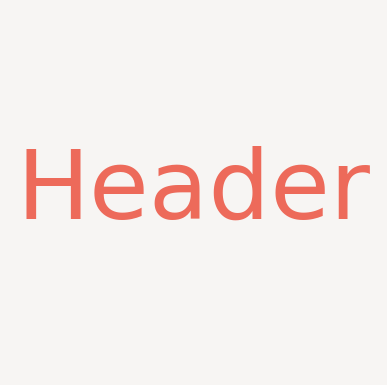

In [2]:
%%capture_png $cell_header

import matplotlib.pyplot as plt
import numpy as np
import scipy
from skimage.morphology import ball, cube, octahedron
from skimage import data

def plot_voxels(varray, ax=None, title=None, linewidth=0.8):
    cmap = plt.get_cmap("YlGnBu")

    if ax == None:
        fig = plt.figure(figsize=(16 / 2, 9 / 2))
        ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.view_init(20, 200)
    colors = cmap(varray)
    ax.voxels(varray, facecolors=colors, edgecolor="black", linewidth=linewidth)

    ax.axis("off")
    if title != None:
        ax.set_title(title, fontsize=30)


def structuring_element(array, structure, position=None, alignment_to_index="center"):
    """Draw a structuring element.

    Parameters
    ----------
    array: ndarray
        An array where the structuring element will be placed.
    structure: ndarray
        A structuring element.
    position: array_like, optional
        The position of the structuring element in the output image.
        When no position is given, the stucuting element will be drawn in the center of the array.
        If one or more array axis haven an even count of total elements and therefore no integer as center index,
        the center index is rounded down to the next integer.
    alignment_to_index: string, optional
        Can be either "center" or "corner".
    """
    if position == None:
        i, j, k = array.shape
        position = np.array(
            [int(np.ceil(i / 2)), int(np.ceil(j / 2)), int(np.ceil(k / 2))]
        )
    x = position[0]
    y = position[1]
    z = position[2]
    strulen_x = structure.shape[0]
    strulen_y = structure.shape[1]
    strulen_z = structure.shape[2]
    if alignment_to_index == "center":
        halfxA = int(np.floor(strulen_x / 2))
        halfxB = int(np.ceil(strulen_x / 2))
        halfyA = int(np.floor(strulen_y / 2))
        halfyB = int(np.ceil(strulen_y / 2))
        halfzA = int(np.floor(strulen_z / 2))
        halfzB = int(np.ceil(strulen_z / 2))
        array[
            x - halfxA : x + halfxB, y - halfyA : y + halfyB, z - halfzA : z + halfzB
        ] = structure
    if alignment_to_index == "corner":
        array[x : x + strulen_x, y : y + strulen_y, z : z + strulen_z] = structure

    return array



import matplotlib.pyplot as plt  # NOT

%config InlineBackend.print_figure_kwargs = {'pad_inches':0} # NOT


fix, ax = plt.subplots(figsize=(5, 5), facecolor="#F7F5F3")  # NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A")  # NOT
ax.text(0.5, 0.5, "Header", **text_kwargs)  # NOT
ax.axis("off");  # NOT

# Structuing elements

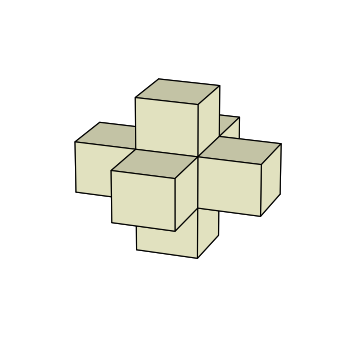

In [3]:
%%capture_png $cell_normal
arrray = scipy.ndimage.generate_binary_structure(3, 1)
plot_voxels(arrray)

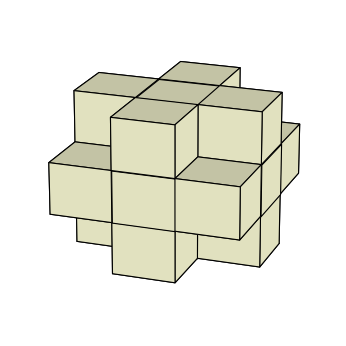

In [4]:
%%capture_png $cell_normal
arrray = scipy.ndimage.generate_binary_structure(3, 2)
plot_voxels(arrray)

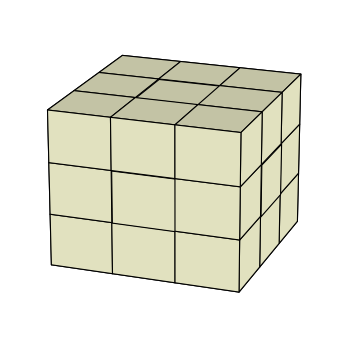

In [5]:
%%capture_png $cell_normal
arrray = scipy.ndimage.generate_binary_structure(3, 3)
plot_voxels(arrray)

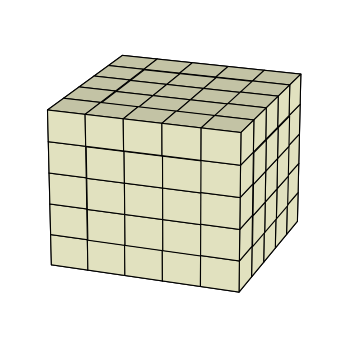

In [6]:
%%capture_png $cell_normal
arrray = cube(5)
plot_voxels(arrray)

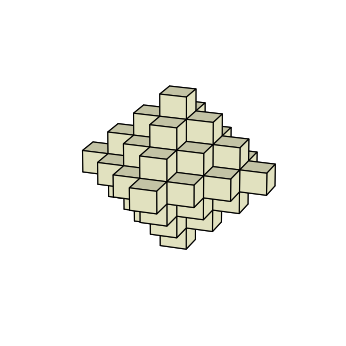

In [7]:
%%capture_png $cell_normal
arrray = octahedron(3)
plot_voxels(arrray)

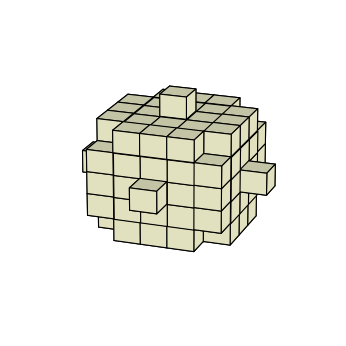

In [8]:
%%capture_png $cell_normal
arrray = ball(3)
plot_voxels(arrray)

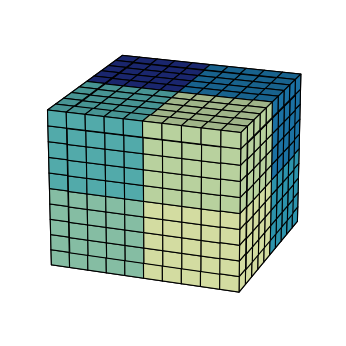

In [9]:
%%capture_png $cell_normal
import matplotlib.pyplot as plt
import numpy as np

grids = 2
boxs = 5

voxelarray = np.zeros((boxs * grids, boxs * grids, boxs * grids))

i = 1
for xi in range(0, 2):
    for yi in range(0, 2):
        for zi in range(0, 2):
            voxelarray[
                xi * boxs : xi * boxs + boxs,
                yi * boxs : yi * boxs + boxs,
                zi * boxs : zi * boxs + boxs,
            ] = i
            i += 1

voxelarray = np.uint8(voxelarray * 255 / i)

plot_voxels(voxelarray)

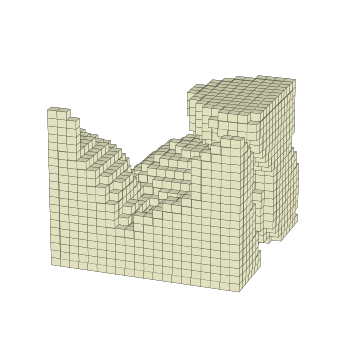

In [10]:
%%capture_png $cell_normal

voxelarray = data.binary_blobs(length=110, volume_fraction=0.6, n_dim=3, seed=9)
voxelarray = voxelarray[90:, 90:, 90:]
# plt.imshow(voxelarray[:,:,3])
plot_voxels(voxelarray, linewidth=0.1)